## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn #necessary to create correlation matrix

# Tratamento (entrega 2)
> Developed in "**/data_treatment.ipynb**"

# Caracterização (Entrega 3)

In [3]:
df_cleaned = pd.read_excel('output/fluxo_escolar_2021_cleaned.xlsx',
                           engine='openpyxl',
                           index_col=[0])
df_cleaned.head()

,municipio,id_escola,aprovado,reprovado,abandono
0,PIRAJU,34320,100.00,0.00,0.00
1,PIRAJU,34344,94.00,2.00,4.00
2,PIRAJU,34356,100.00,0.00,0.00
3,PIRAJU,34459,100.00,0.00,0.00
6,AMERICANA,17176,79.82,19.29,0.89


## Creating Standard bypass

In [12]:
std_reprovado = df_cleaned['reprovado'].std()
std_aprovado = df_cleaned['aprovado'].std()
std_abandono = df_cleaned['abandono'].std()

array_std = [['reprovado',str(std_reprovado)],['aprovado',str(std_aprovado)],['abandono',str(std_abandono)]]

df_std = pd.DataFrame(array_std, columns=['Coluna de análise','Resultado desvio padrão'])
df_std

#print(f"Desvio padrão\nReprovado: { str(std_reprovado)} \nAprovado: {str(std_aprovado)} \nAbandono: { str(std_abandono)}")

,Coluna de análise,Resultado desvio padrão
0,reprovado,3.9538715157081272
1,aprovado,4.463648256286679
2,abandono,1.9621263598444405


## Creating Central Tendency 

In [4]:
mean = df_cleaned['aprovado'].mean() #media
median = df_cleaned['aprovado'].median() #mediana
quantile = df_cleaned['aprovado'].quantile()
mode = df_cleaned['aprovado'].mode().iloc[0]

print(f"Mode: { str(mode)} \nMedian: {str(median)} \nQuantile: {str(quantile)} \nMean: {str(mean)}")

Mode: 100.0 
Median: 100.0 
Quantile: 100.0 
Mean: 97.62872897196263


### Creating a Correlation Matrix

In [11]:
correlation = df_cleaned[['aprovado','reprovado','abandono']].corr()
correlation

,aprovado,reprovado,abandono
aprovado,1.000000,-0.898291,-0.464762
reprovado,-0.898291,1.000000,0.028430
abandono,-0.464762,0.028430,1.000000


# Visualização das informações (Entrega 4)

## Standard bypass plot

<AxesSubplot: xlabel='Coluna de análise', ylabel='Resultado desvio padrão'>

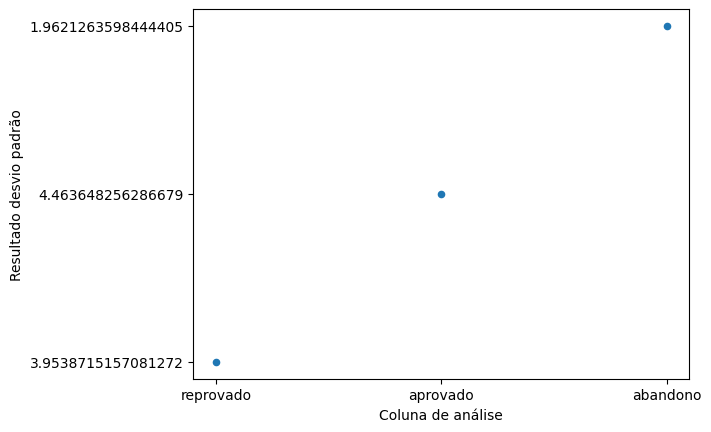

In [21]:
df_std.plot(x='Coluna de análise', y='Resultado desvio padrão', kind='scatter')

## Correlation matrix plot

<AxesSubplot: >

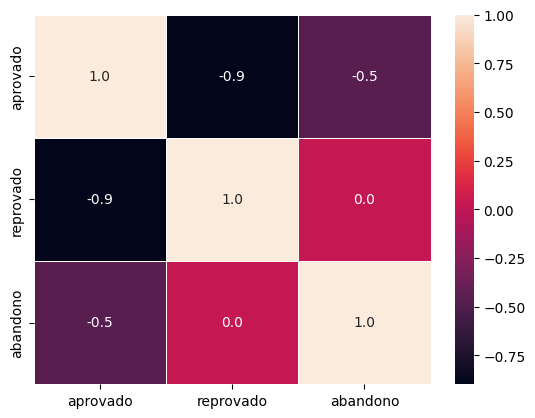

In [16]:
plot_correlation = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot_correlation